
This notebook serves as working with a CSV dataset for training a Machine Learning model. Each section represents a stage  from understanding the problem to deploying the model.

#  Problem Definition

### Objective: 
#####                Predict a person's medical expenses based on features such as age, gender, BMI, number of children, discount eligibility, and region.

### Target Variable:
##### expenses

### ML Task Type: 
####              Regression, since expenses is a continuous numerical value.



# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# 2. Data Loading



In [2]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


# 3. Data Cleaning

Cleaning and preparing dataset:

- Handle missing values
- Removing duplicates
- Visualizing Data
- Detect and handle outliers (but removal cause lost of data which directly effects performace)

In [3]:
def getinfo(df):
    print("First 5 rows of the data:")
    display(df.sample(10))
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

    print("Duplicated values are: ")
    df.duplicated().sum()
     

getinfo(df)    

First 5 rows of the data:


,age,gender,bmi,children,discount_eligibility,region,expenses,premium
671,29,female,31.2,0,no,northeast,3943.60,39.4360
816,24,female,24.2,0,no,northwest,2842.76,28.4276
1120,23,female,31.4,0,yes,southwest,34166.27,341.6627
74,44,male,27.4,2,no,southwest,7726.85,154.5370
705,33,female,32.9,2,no,southwest,5375.04,107.5008
1217,29,male,37.3,2,no,southeast,4058.12,40.5812
70,27,female,24.8,0,yes,southeast,16577.78,165.7778
614,20,female,33.0,0,no,southeast,1880.07,18.8007
67,40,male,26.3,1,no,northwest,6389.38,127.7876
731,53,male,21.4,1,no,southwest,10065.41,201.3082


Shape of the data:


(1338, 8)

Statistical description of the data


,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


None

Null Values in the data


age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

Duplicated values are: 


In [4]:
df.isna().sum()   # 0 
df.isnull().sum()   # 0 
df.duplicated().sum() 

1

In [5]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='expenses', ylabel='Count'>

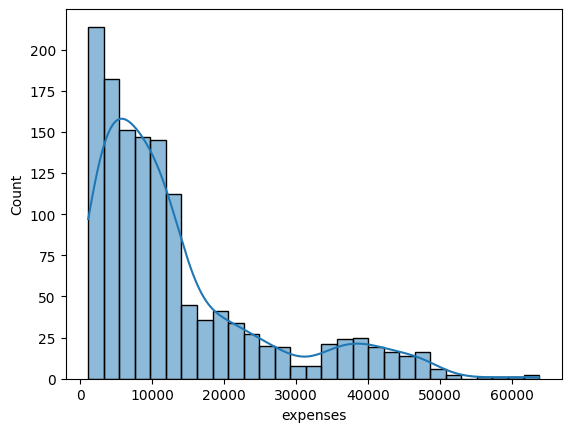

In [6]:
sns.histplot(df['expenses'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

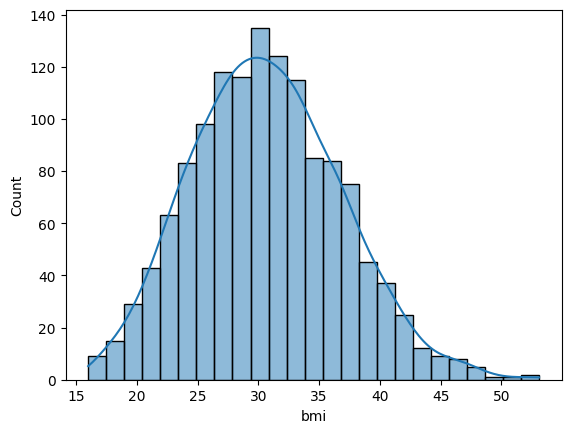

In [7]:
sns.histplot(df['bmi'], kde=True)

<Axes: ylabel='expenses'>

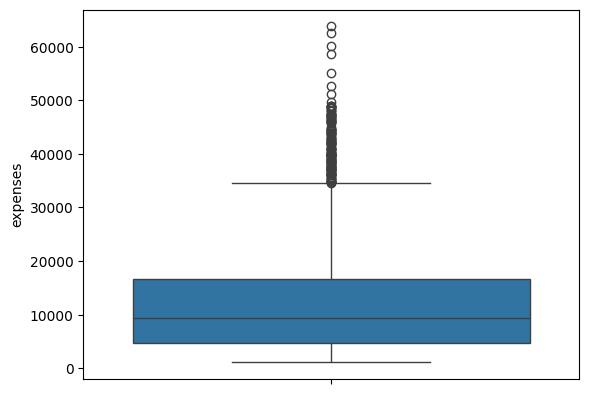

In [8]:
sns.boxplot(df['expenses'])

In [9]:
# df= df[df['expenses']<=49500]

#### The following code tries to handle outliers but as the dataset has limitted rows removing 200 rows cause bad performance of algorithms

In [10]:
# Q1 = df['expenses'].quantile(0.25)
# Q3 = df['expenses'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df['expenses'] = df['expenses'].clip(lower=lower_bound, upper=upper_bound)


In [11]:
df['expenses'].skew()

1.5153909165486397

In [12]:
# pt = PowerTransformer(method='yeo-johnson')
# df['expenses'] = pt.fit_transform(df[['expenses']])

# 4. Exploratory Data Analysis (EDA)

Understand your data's structure and relationships:

- Plot distributions: histograms, boxplots
- Explore correlations: heatmaps, Pairplots


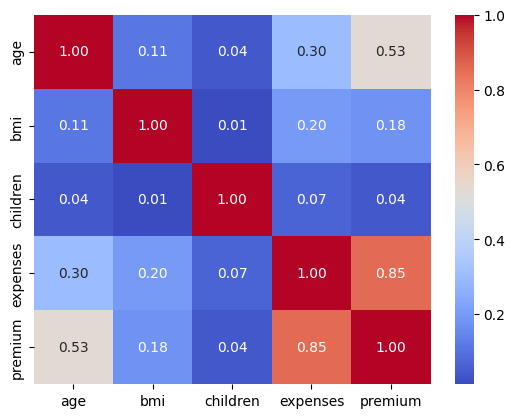

In [13]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f"); plt.show()

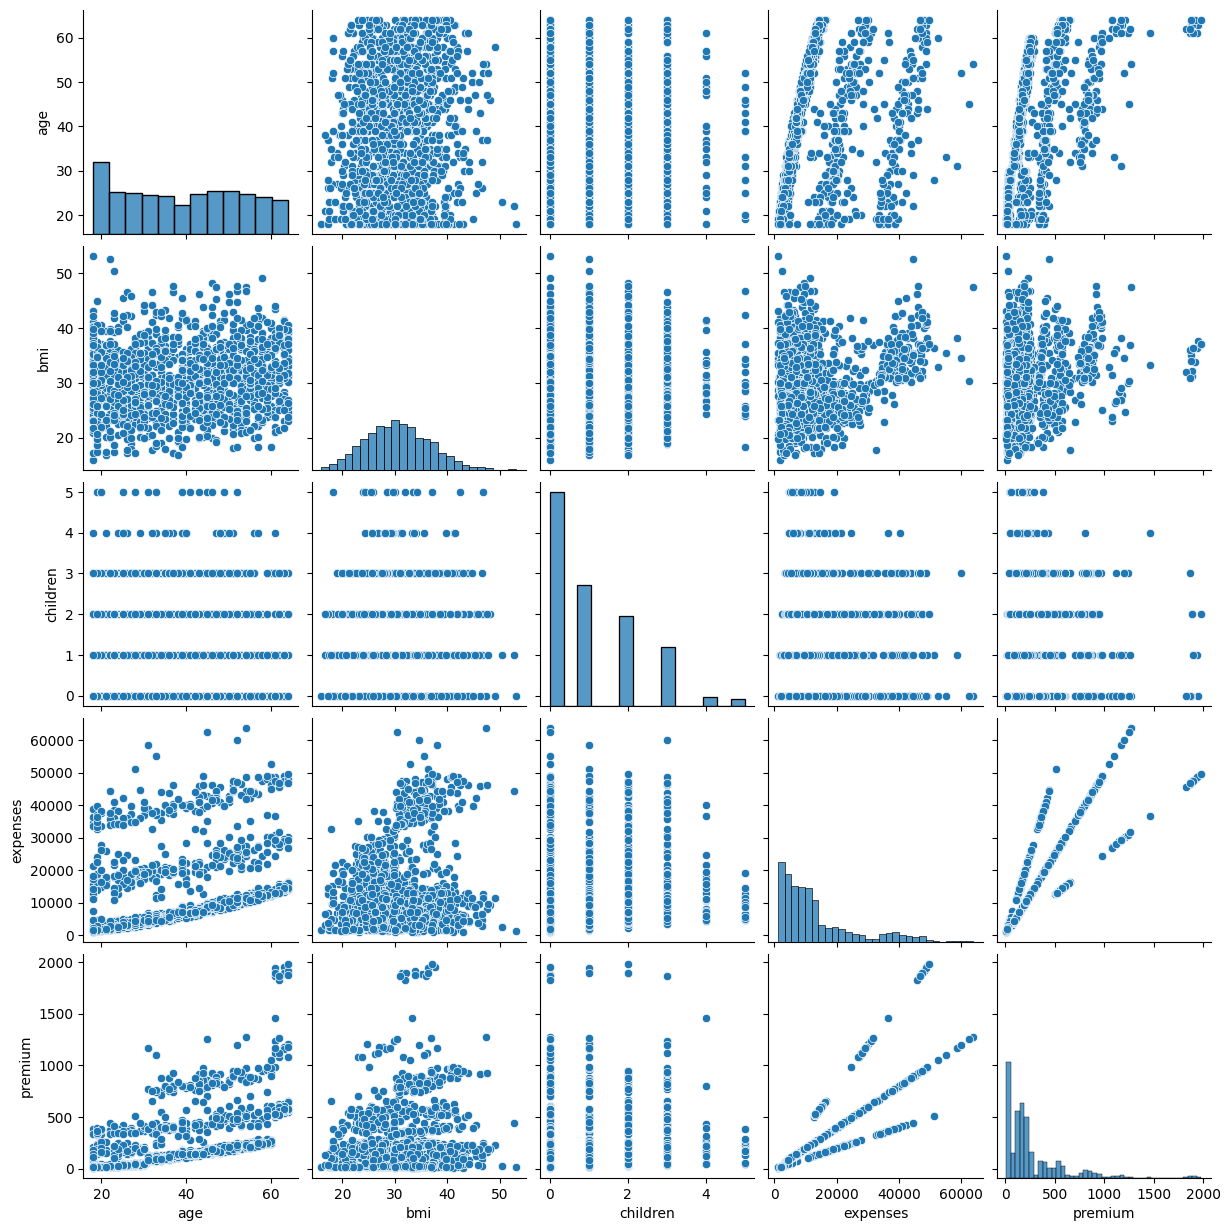

In [14]:
sns.pairplot(df)

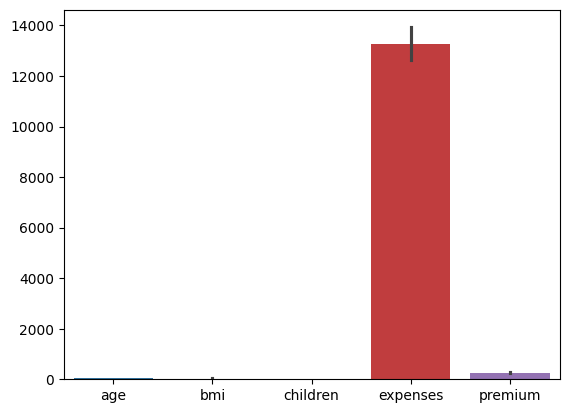

In [15]:
for col in df.select_dtypes(include='object').columns:
    sns.barplot(data=df); plt.show()
    break

In [16]:
df['premium'].argmax()
# df['premium'].argmin()

1240

# 5. Feature Engineering

Enhance dataset with meaningful features:

- Creating new features
- Encode categorical variables
- Removing Premium feature that was causing data leakage
  

In [17]:
df['age'].argmin()
df['age'].argmax()

62

In [18]:
len(df['premium'].unique())

1337

In [19]:
df['premium'].argmin()
df['premium'].argmax()

1240

In [20]:
for index, row in df.iterrows():
    age = row['age']
    if age < 13:
        df.loc[index, 'age_group'] = "Child"
    elif age < 20:
        df.loc[index, 'age_group'] = "Teen"
    elif age < 60:
        df.loc[index, 'age_group'] = "Adult"
    else:
        df.loc[index, 'age_group'] = "Senior"



def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese Class 1'
    elif bmi < 40:
        return 'Obese Class 2'
    else:
        return 'Obese Class 3'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [21]:
# df=df.drop('age', axis=1)
df=df.drop('premium', axis=1)   # was causing data leakage as drived from output or targeted feature
# df = df.drop('bmi' , axis=1)


In [22]:
import pandas as pd


categorical_cols = ['gender', 'discount_eligibility', 'region', 'age_group', 'bmi_category']


df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)



In [23]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'gender_male',
       'discount_eligibility_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_group_Senior', 'age_group_Teen',
       'bmi_category_Obese Class 1', 'bmi_category_Obese Class 2',
       'bmi_category_Obese Class 3', 'bmi_category_Overweight',
       'bmi_category_Underweight'],
      dtype='object')

In [24]:
df.head()

,age,bmi,children,expenses,gender_male,discount_eligibility_yes,region_northwest,region_southeast,region_southwest,age_group_Senior,age_group_Teen,bmi_category_Obese Class 1,bmi_category_Obese Class 2,bmi_category_Obese Class 3,bmi_category_Overweight,bmi_category_Underweight
0,19,27,0,16884,0,1,0,0,1,0,1,0,0,0,1,0
1,18,33,1,1725,1,0,0,1,0,0,1,1,0,0,0,0
2,28,33,3,4449,1,0,0,1,0,0,0,1,0,0,0,0
3,33,22,0,21984,1,0,1,0,0,0,0,0,0,0,0,0
4,32,28,0,3866,1,0,1,0,0,0,0,0,0,0,1,0


<Axes: >

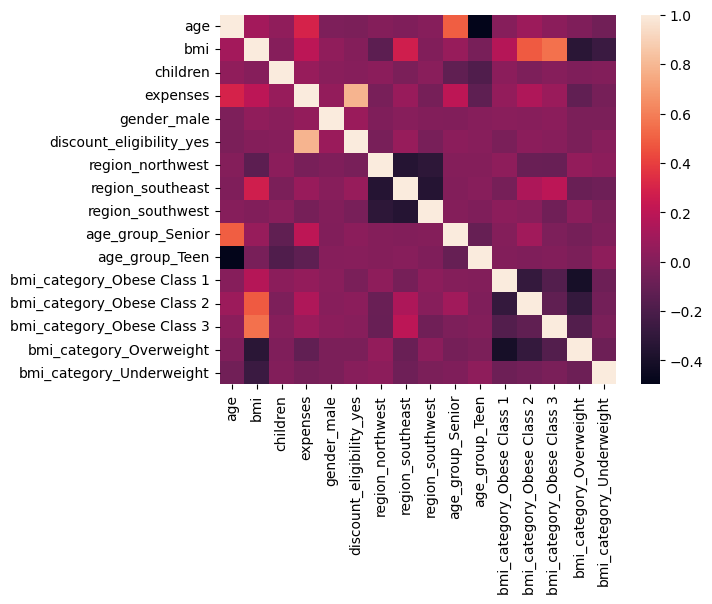

In [25]:
sns.heatmap(df.corr())

# 6. Data Splitting



In [26]:

from sklearn.model_selection import train_test_split
X= df.drop('expenses', axis=1)
y= df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  7. Model Selection & Training & Evaluation

In this section we tried all important Regression Models and selected Gradient Boosting which is an Ensemble Method



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    max_error
)
from sklearn.model_selection import cross_val_score,train_test_split

def check_all_regressors(X_train, X_test, y_train, y_test, X_full, y_full):
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor

    models = {
        'Linear Regression': LinearRegression(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Regressor': SVR(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'XGBoost': XGBRegressor()
    }

    results = []

    n = len(X_test)
    p = X_test.shape[1]  

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        cv_r2 = cross_val_score(model, X_full, y_full, cv=5, scoring='r2').mean()

        results.append({
            'Model': name,
            'Train R²': round(train_r2, 3),
            'Test R²': round(test_r2, 3),
            'MAE': round(mae, 2),
            'MSE': round(mse, 2),
            'RMSE': round(rmse, 2),
         
            'CV R² Mean': round(cv_r2, 3)
        })

    results_df = pd.DataFrame(results)
    return display(results_df)


In [28]:
check_all_regressors(X_train, X_test, y_train, y_test, X, y)

,Model,Train R²,Test R²,MAE,MSE,RMSE,CV R² Mean
0,Linear Regression,0.740,0.802,4331.17,3.637935e+07,6031.53,0.751
1,K-Nearest Neighbors,0.422,0.127,8406.58,1.605004e+08,12668.87,0.127
2,Decision Tree,0.999,0.762,3235.85,4.375160e+07,6614.50,0.713
3,Random Forest,0.973,0.874,2778.24,2.323974e+07,4820.76,0.832
4,Support Vector Regressor,-0.102,-0.134,9256.66,2.084625e+08,14438.23,-0.104
5,Gradient Boosting,0.879,0.901,2493.95,1.827506e+07,4274.93,0.859
6,AdaBoost,0.821,0.867,3989.19,2.440194e+07,4939.83,0.807
7,XGBoost,0.991,0.847,3140.67,2.819514e+07,5309.91,0.804


#  9. Hyperparameter Tuning

Optimize model parameters using RandomizedSearchCV




In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
from scipy.stats import randint, uniform


param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.001, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8]
}


gb = GradientBoostingRegressor(random_state=42)


random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=1000,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


n = len(y_test)
p = X_test.shape[1]
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
adjusted_r2 = 1 - ((1 - test_r2) * (n - 1) / (n - p - 1))
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
maxerr = max_error(y_test, y_test_pred)
cv_score = random_search.best_score_

# Results table
results = {
    'Metric': [
        'Train R²', 'Test R²', 'Adjusted Test R²',
        'MAE', 'MSE', 'RMSE', 'MAPE (%)', 'Max Error', 'CV R² (5-Fold)'
    ],
    'Score': [
        round(train_r2, 3), round(test_r2, 3), round(adjusted_r2, 3),
        round(mae, 2), round(mse, 2), round(rmse, 2), round(mape * 100, 2),
        round(maxerr, 2), round(cv_score, 3)
    ]
}
pd.set_option('display.float_format', '{:.3f}'.format)
results_df = pd.DataFrame(results)
print("🔧 Best Hyperparameters:\n", random_search.best_params_)
display(results_df)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
🔧 Best Hyperparameters:
 {'learning_rate': 0.006743460399051004, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 7, 'n_estimators': 631, 'subsample': 0.9843680587715299}


,Metric,Score
0,Train R²,0.865
1,Test R²,0.902
2,Adjusted Test R²,0.896
3,MAE,2457.100
4,MSE,18042947.690
5,RMSE,4247.700
6,MAPE (%),33.150
7,Max Error,19149.210
8,CV R² (5-Fold),0.847


#  10. Model Saving in pkl format 


In [30]:
import joblib
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']